In [ ]:
# Author: Rifat Saeed
# Classification of Brain Tumer MRI using Convolutional Neural Network(CNN)

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [2]:
img_width, img_height = 32, 32

train_data_dir = 'C:\DataScience\ResearchArticle\Training'
validation_data_dir = 'C:\DataScience\ResearchArticle\Testing'

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=5,
    width_shift_range=0.2,  # horizontal shift
    zoom_range=0.2,
    brightness_range=[0.2,0.8],  # brightness
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',)
test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=5,
    width_shift_range=0.2,  # horizontal shift
    zoom_range=0.2,
    brightness_range=[0.2,0.8],  # brightness
    horizontal_flip=True)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(strides=(2,2),padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(strides=(2,2),padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(strides=(2,2),padding='same'))
model.add(Dropout(0.1))

In [4]:
model.add(Flatten()) 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         7

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
EPOCHS = 300
BATCH_SIZE = 32
STEPS_PER_EPOCH = 150
VALIDATION_STEPS = 16
history=model.fit(
 train_generator,
 steps_per_epoch=STEPS_PER_EPOCH,
 epochs=EPOCHS,
 validation_data=validation_generator)

Epoch 1/300
150/150 [==============================] - 51s 337ms/step - loss: 0.5553 - accuracy: 0.3248 - val_loss: 0.5348 - val_accuracy: 0.3341
Epoch 2/300
150/150 [==============================] - 39s 263ms/step - loss: 0.5176 - accuracy: 0.3871 - val_loss: 0.5047 - val_accuracy: 0.4355
Epoch 3/300
150/150 [==============================] - 38s 255ms/step - loss: 0.4441 - accuracy: 0.5370 - val_loss: 0.4262 - val_accuracy: 0.5873
Epoch 4/300
150/150 [==============================] - 38s 252ms/step - loss: 0.3750 - accuracy: 0.6246 - val_loss: 0.3924 - val_accuracy: 0.6194
Epoch 5/300
150/150 [==============================] - 39s 257ms/step - loss: 0.3420 - accuracy: 0.6750 - val_loss: 0.3843 - val_accuracy: 0.6445
Epoch 6/300
150/150 [==============================] - 38s 252ms/step - loss: 0.3166 - accuracy: 0.7069 - val_loss: 0.3378 - val_accuracy: 0.6842
Epoch 7/300
150/150 [==============================] - 39s 260ms/step - loss: 0.2945 - accuracy: 0.7301 - val_loss: 0.3123 -

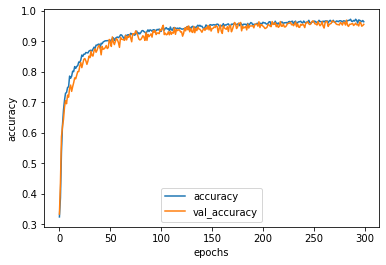

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(loc='lower center')
plt.show()

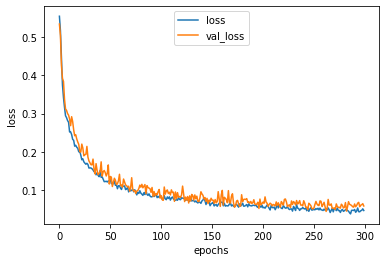

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(loc='upper center')
plt.show()

In [ ]:
# https://towardsdatascience.com/increase-the-accuracy-of-your-cnn-by-following-these-5-tips-i-learned-from-the-kaggle-community-27227ad39554